## Machine Learning

In [1]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data.
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#libraries to help with model building
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
    BaggingRegressor)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier

# to suppress scientifiv notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
data=pd.read_csv('/content/gdrive/MyDrive/Case Study-2(Sarcastic Comments-REDDIT)/train-balanced-sarcasm.csv')
data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [4]:
data.isnull().sum()

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [5]:
data['comment']=data['comment'].fillna('No Comment')

In [6]:
# Remove Emoji
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [7]:
def decontractions(phrase):
    """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
from nltk.corpus import stopwords
from tqdm import tqdm
import re
stopwords = stopwords.words('english')
def preprocess(text_col,stopword):
    preprocessed = []
    for sentence in tqdm(text_col.values):
        # Replace "carriage return" with "space".
        sentence=str(sentence)
        sent = sentence.replace('\\r', ' ')
        # Replace "quotes" with "space".
        sent = sent.replace('\\"', ' ')
        # Replace "line feed" with "space".
        sent = sent.replace('\\n', ' ')
        # Replace characters between words with "space".
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        #remove stop words
        #decontraction
        sent=decontractions(sent)
        #Remove emoji
        sent=deEmojify(sent)
        if stopword:
            sent = ' '.join(e for e in sent.split() if e not in stopwords)
        else:
           sent = ' '.join(e for e in sent.split())
        # to lowercase
        preprocessed.append(sent.lower().strip())
    return preprocessed

In [10]:
data['comment']=preprocess(data['comment'],stopword=False)

100%|██████████| 1010826/1010826 [00:28<00:00, 35773.66it/s]


In [11]:
data['parent_comment']=preprocess(data['parent_comment'],stopword=False)

100%|██████████| 1010826/1010826 [00:35<00:00, 28222.92it/s]


In [12]:
data.isnull().sum()

label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64

In [13]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Polarity Score

In [14]:
import nltk
from tqdm import tqdm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def generate_sentiment_scores(data):
    sid = SentimentIntensityAnalyzer()
    neg=[]
    pos=[]
    neu=[]
    comp=[]
    for sentence in tqdm(data['parent_comment'].values): 
        sentence_sentiment_score = sid.polarity_scores(sentence)
        comp.append(sentence_sentiment_score['compound'])
        neg.append(sentence_sentiment_score['neg'])
        pos.append(sentence_sentiment_score['pos'])
        neu.append(sentence_sentiment_score['neu'])
    return comp,neg,pos,neu

In [15]:
data['compound'],data['negative'],data['positive'],data['neutral']=generate_sentiment_scores(data)

100%|██████████| 1010826/1010826 [04:45<00:00, 3544.94it/s]


In [16]:
data['com_len']=data['comment'].apply(lambda x:len(x.split()))

In [17]:
data['parent_com_len']=data['parent_comment'].apply(lambda x:len(x.split()))

In [18]:
y=data['label']
X=data.drop(['label','date','created_utc'],axis=1)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [20]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vec = tfidf_desc = TfidfVectorizer(max_features=200000, ngram_range=(1, 3), stop_words='english')
X_train_comment = vec.fit_transform(X_train['comment'])
X_test_comment = vec.transform(X_test['comment'])

CPU times: user 35.5 s, sys: 865 ms, total: 36.3 s
Wall time: 36.2 s


In [21]:
print(X_train_comment.shape)

(707578, 200000)


In [22]:
%%time
vec = tfidf_desc = TfidfVectorizer(max_features=200000, ngram_range=(1, 3), stop_words='english')
X_train_parent = vec.fit_transform(X_train['parent_comment'])
X_test_parent = vec.transform(X_test['parent_comment'])

CPU times: user 1min 31s, sys: 2.3 s, total: 1min 33s
Wall time: 1min 33s


In [23]:
%%time
from sklearn.preprocessing import LabelBinarizer
lb_brand_author = vec = tfidf_desc = TfidfVectorizer()
X_train_author = lb_brand_author.fit_transform(X_train['author'])
X_test_author = lb_brand_author.transform(X_test['author'])

CPU times: user 5.62 s, sys: 94.3 ms, total: 5.71 s
Wall time: 5.68 s


In [24]:
%%time
from sklearn.preprocessing import LabelBinarizer
lb_brand_subreddit = LabelBinarizer(sparse_output=True)
X_train_subreddit = lb_brand_author.fit_transform(X_train['subreddit'])
X_test_subreddit = lb_brand_author.transform(X_test['subreddit'])

CPU times: user 3.04 s, sys: 8.84 ms, total: 3.05 s
Wall time: 3.04 s


In [25]:
%%time
from sklearn.preprocessing import Normalizer
trans = Normalizer()
X_train_score=trans.fit_transform(X_train['score'].values.reshape(-1,1))
X_test_score=trans.transform(X_test['score'].values.reshape(-1,1))

CPU times: user 14.6 ms, sys: 0 ns, total: 14.6 ms
Wall time: 14 ms


In [26]:
%%time
trans = Normalizer()
X_train_ups=trans.fit_transform(X_train['ups'].values.reshape(-1,1))
X_test_ups=trans.transform(X_test['ups'].values.reshape(-1,1))

CPU times: user 12 ms, sys: 2.01 ms, total: 14 ms
Wall time: 13.4 ms


In [27]:
%%time
trans = Normalizer()
X_train_downs=trans.fit_transform(X_train['downs'].values.reshape(-1,1))
X_test_downs=trans.transform(X_test['downs'].values.reshape(-1,1))

CPU times: user 15.4 ms, sys: 0 ns, total: 15.4 ms
Wall time: 14.8 ms


In [28]:
%%time
trans = Normalizer()
X_train_comp=trans.fit_transform(X_train['compound'].values.reshape(-1,1))
X_test_comp=trans.transform(X_test['compound'].values.reshape(-1,1))

CPU times: user 20.3 ms, sys: 2.01 ms, total: 22.3 ms
Wall time: 21.4 ms


In [29]:
%%time
trans = Normalizer()
X_train_neg=trans.fit_transform(X_train['negative'].values.reshape(-1,1))
X_test_neg=trans.transform(X_test['negative'].values.reshape(-1,1))

CPU times: user 19.9 ms, sys: 1.99 ms, total: 21.9 ms
Wall time: 21.4 ms


In [30]:
%%time
trans = Normalizer()
X_train_pos=trans.fit_transform(X_train['positive'].values.reshape(-1,1))
X_test_pos=trans.transform(X_test['positive'].values.reshape(-1,1))

CPU times: user 20.8 ms, sys: 2 ms, total: 22.8 ms
Wall time: 22.2 ms


In [31]:
%%time
trans = Normalizer()
X_train_neu=trans.fit_transform(X_train['neutral'].values.reshape(-1,1))
X_test_neu=trans.transform(X_test['neutral'].values.reshape(-1,1))

CPU times: user 14.5 ms, sys: 2 ms, total: 16.5 ms
Wall time: 16.2 ms


In [32]:
%%time
trans = Normalizer()
X_train_com_len=trans.fit_transform(X_train['com_len'].values.reshape(-1,1))
X_test_com_len=trans.transform(X_test['com_len'].values.reshape(-1,1))

CPU times: user 13.2 ms, sys: 2.01 ms, total: 15.2 ms
Wall time: 14.6 ms


In [33]:
%%time
trans = Normalizer()
X_train_parent_com_len=trans.fit_transform(X_train['parent_com_len'].values.reshape(-1,1))
X_test_parent_com_len=trans.transform(X_test['parent_com_len'].values.reshape(-1,1))

CPU times: user 14.6 ms, sys: 1.02 ms, total: 15.6 ms
Wall time: 14.4 ms


In [34]:
%%time
from scipy.sparse import hstack
train_s=hstack((X_train_comment,X_train_parent,X_train_author,X_train_subreddit,X_train_score,X_train_ups,X_train_downs,X_train_comp,X_train_neg,X_train_pos,X_train_neu,X_train_com_len,X_train_parent_com_len)).tocsr().astype('float32')
test_s=hstack((X_test_comment,X_test_parent,X_test_author,X_test_subreddit,X_test_score,X_test_ups,X_test_downs,X_test_comp,X_test_neg,X_test_pos,X_test_neu,X_test_com_len,X_test_parent_com_len)).tocsr().astype('float32')

CPU times: user 1.86 s, sys: 62.2 ms, total: 1.92 s
Wall time: 1.91 s


In [35]:
print(train_s.shape,y_train.shape)
print(test_s.shape,y_test.shape)

(707578, 654811) (707578,)
(303248, 654811) (303248,)


In [36]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
        print("log_loss on training set : ",metrics.log_loss(train_y,pred_train))
        print("log_loss on test set : ",metrics.log_loss(test_y,pred_test))
    return score_list # returning the list with train and test scores

In [37]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_s)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:

from tqdm import tqdm
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier,LassoCV,RidgeClassifierCV
from sklearn.metrics import mean_squared_error, make_scorer,mean_squared_log_error
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list

models.append(
    (
        "logistic",
        Pipeline(
            steps=[
                ("logistic", LogisticRegression(random_state=1,n_jobs=-1)),
            ]
        ),
    )
)


models.append(
    (
        "lgbm",
        Pipeline(
            steps=[
                ("LGBM", LGBMClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "SGD",
        Pipeline(
            steps=[
                ("SGD", SGDClassifier(random_state=1)),
            ]
        ),
    )
)




results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
from tqdm import tqdm
for name, model in tqdm(models):
    # Setting number of splits equal to 5
    scores = cross_val_score(model,train_s,y_train, cv=5,
                             scoring='accuracy')
    results.append(scores)
    names.append(name)
    print("{}: {}".format(name, scores.mean() * 100))

 33%|███▎      | 1/3 [02:13<04:27, 133.83s/it]

logistic: 67.3952549688081


 67%|██████▋   | 2/3 [08:49<04:47, 287.61s/it]

lgbm: 65.72081094930769


100%|██████████| 3/3 [09:05<00:00, 181.82s/it]

SGD: 66.17743778479301


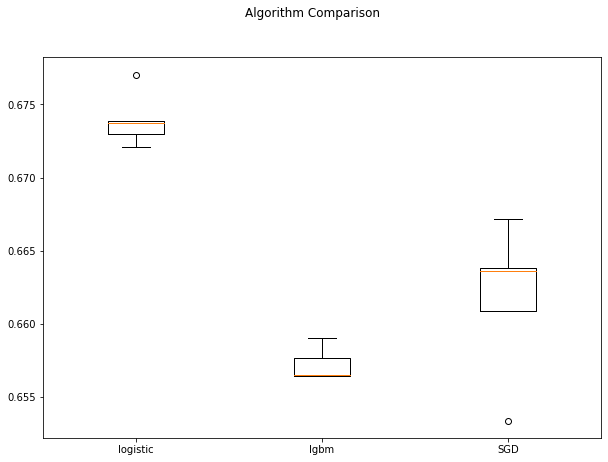

In [39]:
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")




ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

**Logistic Regression(RandomizedSearchCV)**

In [40]:
%%time
from sklearn.model_selection import RandomizedSearchCV
  
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
logreg = LogisticRegression()
  
logreg_cv = RandomizedSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(train_s, y_train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.6753319067692841
CPU times: user 33min 28s, sys: 55min 50s, total: 1h 29min 18s
Wall time: 22min 56s


In [41]:
model= LogisticRegression(C=0.05179474679231213)
model.fit(train_s,y_train)

LogisticRegression(C=0.05179474679231213, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy on training set :  0.7023677954939244
Accuracy on test set :  0.6779401677834643
Recall on training set :  0.6625813691211428
Recall on test set :  0.6374452593257004
Precision on training set :  0.7198629148407583
Precision on test set :  0.6936215409346653
log_loss on training set :  10.279955245770465
log_loss on test set :  11.123665100004112


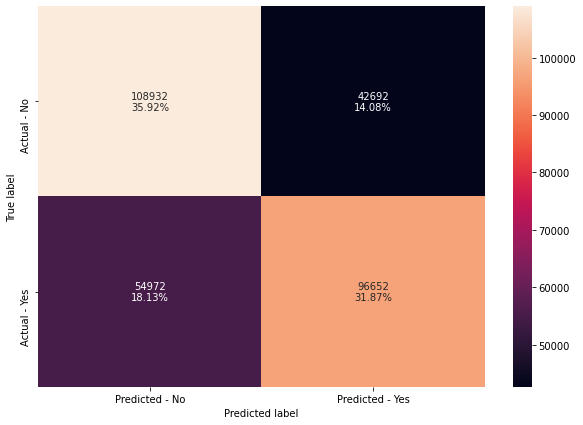

In [42]:
get_metrics_score(model,train_s,test_s,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(model, y_test)

**GridSearchCV(LGBM)**

In [ ]:
%%time
from lightgbm import LGBMClassifier
params={'n_estimators':[100,500,1000],'learning_rate':[0.05,0.15,0.25]}
model_lgbm= LGBMClassifier(colsample_bytree=0.8,
               min_child_samples=50)

model=GridSearchCV(estimator = model_lgbm, param_grid = params,
                                    return_train_score=True, scoring = 'accuracy',\
                                    cv = 3,verbose=2,n_jobs=-1)
model.fit(train_s,y_train)

In [43]:
%%time
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(n_estimators=900, learning_rate=0.15,max_depth=5,
               num_leaves=31,subsample=0.9,colsample_bytree=0.8,
               min_child_samples=50, n_jobs=-1)

lgbm_model.fit(train_s, y_train)

CPU times: user 8min 51s, sys: 221 ms, total: 8min 51s
Wall time: 2min 15s


Accuracy on training set :  0.6884103236674968
Accuracy on test set :  0.6791207196749854
Recall on training set :  0.5939670255434737
Recall on test set :  0.5871300058038306
Precision on training set :  0.7322860438453738
Precision on test set :  0.7195056899004267
log_loss on training set :  10.762012972653922
log_loss on test set :  11.082869222260308


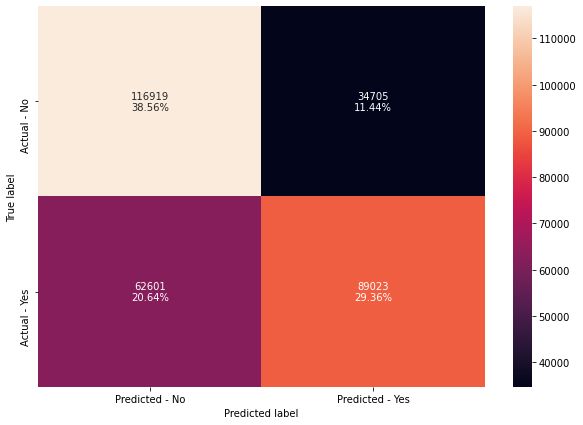

In [44]:
get_metrics_score(lgbm_model,train_s,test_s,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(lgbm_model, y_test)

# SGD Classifier


In [45]:
%%time
from sklearn.linear_model import SGDClassifier
parameters = {'alpha':[10**x for x in range(-5, 5)],
              }
model_lr_reg = SGDClassifier(loss = "squared_loss",fit_intercept=False,l1_ratio=0.6)
model=GridSearchCV(estimator = model_lr_reg, param_grid = parameters,
                                    return_train_score=True, scoring = 'accuracy',\
                                    cv = 5,verbose=2,n_jobs=-1)
model.fit(train_s,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 29.7min finished


CPU times: user 7.5 s, sys: 1.56 s, total: 9.05 s
Wall time: 29min 43s


In [46]:
model=SGDClassifier(alpha=0.00001)
model.fit(train_s,y_train)

SGDClassifier(alpha=1e-05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy on training set :  0.7666857929443821
Accuracy on test set :  0.6718329552049808
Recall on training set :  0.6883537927974018
Recall on test set :  0.5827837281696829
Precision on training set :  0.8162272131598087
Precision on test set :  0.7090675653988124
log_loss on training set :  8.058449188937065
log_loss on test set :  11.334583779350103


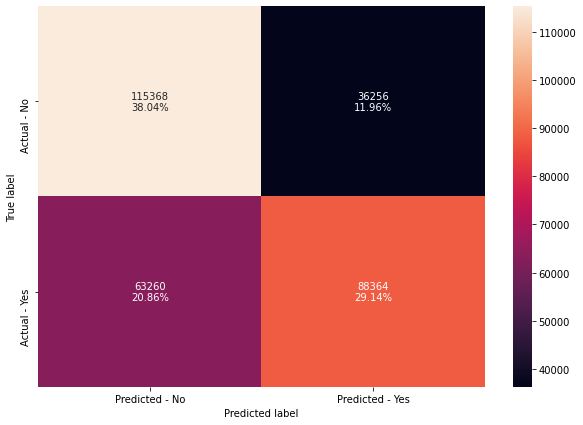

In [47]:
get_metrics_score(model,train_s,test_s,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(model, y_test)